## Task 3: Calculating Bias and Variance

In [1]:
#Import all modules
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pickle
import random
import matplotlib.pyplot as plt


### 3.1 How to Re-Sample data

In [2]:
### (2.3.1)

# loading the training set
fileobj_train = open("train_dataset.pickle",'rb')
train_data = pickle.load(fileobj_train)
train = pd.DataFrame(train_data, columns = ['X','Y'])#.sample(frac=1) ##Pandas DataFrame named "train" with two 
## columns named "X" and "Y". The data is then shuffled using the sample() method with frac=1, which shuffles the data in place.

# loading the test set
fileobj_test = open("test_dataset.pickle",'rb')
test_data = pickle.load(fileobj_test)
test = pd.DataFrame(test_data, columns=['X', 'Y'])

# divide train dataset into 20 smaller subsets
total_dataset = 20

train_split = np.split(train, total_dataset)


### 3.2 Task

In [3]:
# training the models corresponding to each degree of polynimial fit & 
# each training data subset that we just created randomly

degrees = 15
models = []

# for every degree of polynomial fit (degree = 15)
for i in range(1, degrees + 1, 1):
  current_degree_model = []
  poly = PolynomialFeatures(degree = i) ##It creates a new feature matrix consisting of all polynomial 
                                        ##combinations of the original features up to a specified degree
  
  # for every training data subset
  for j in range(0, total_dataset, 1):
    value = train_split[j]
    value_x = value['X']
    value_y = value['Y']
    value_x = np.array(value_x).reshape(-1,1)
    transformed_value_x = poly.fit_transform(value_x)
    value_y = np.array(value_y).reshape(-1,1)
    
    current_degree_model.append(LinearRegression().fit(transformed_value_x, value_y))
  models.append(current_degree_model)
# print(models)
# Here: models[i][j] means a model trained with polynomial fit of i and using training data subset j

In [4]:

# Calculating the Bias, Variance and Total Error using the models and test dataset

##(extract the X and Y columns from the test dataset and reshape them to 2D arrays with one column using the
##reshape() method).
test_x = test['X']
test_y = test['Y']
value_x = np.array(test_x).reshape(-1,1)
value_y = np.array(test_y).reshape(-1,1)

##empty arrays to store the squared bias, bias, variance, and mean squared error for each degree of polynomial fit.
squared_bias, bias, variance, mse, results = [], [], [], [], []

# for every degree of polynomial fit
for i in range(1,degrees+1,1):
  shape = test_y.shape
  cum_Pvalue_subdataset = np.zeros(shape)
  cum_Pvalue_subdataset = cum_Pvalue_subdataset.reshape(-1,1)
  cum_var = np.zeros(shape)
  cum_var = cum_var.reshape(-1,1)
  cum_err = np.zeros(shape)
  cum_err = cum_err.reshape(-1,1)

    ##(Creates a feature matrix with polynomial features up to degree i using the fit_transform() method of the 
    ##PolynomialFeatures) object.
  transformed_value_x = PolynomialFeatures(degree=i).fit_transform(value_x)
  Pvalue_subdataset = []  ## The predicted values for each subset 

  # for every training data subset j
  for j in range(total_dataset):
    Pvalue_subdataset.append(models[i-1][j].predict(transformed_value_x))
#     print(Pvalue_subdataset[j])
    cum_Pvalue_subdataset += Pvalue_subdataset[j]
    cum_var += Pvalue_subdataset[j]**2
    cum_err += (value_y - Pvalue_subdataset[j])**2
#   print()
#      print(len(value_y)," ",len(Pvalue_subdataset[j]),len(cum_err))
#   print(len(cum_err))
  # convert cumulative values to expected values
  pred = cum_Pvalue_subdataset/total_dataset
  var = (cum_var/total_dataset) - (pred)**2
  cum_err = cum_err/total_dataset
#   print(cum_err)

  squared_bias.append((np.mean((pred-value_y)**2)))
  variance.append(np.mean(var))
  results.append(pred)
  bias.append(np.mean(abs(pred-value_y)))
  mse.append(np.mean(cum_err))
# print(cum_err)    

In [5]:
# Tabualising the bias and variance

table = pd.DataFrame(np.array([bias, variance]).T)
table.columns = ['Bias', 'Variance']
table.index = range(1, degrees+1, 1)
table.round(5)
# print(bias)


,Bias,Variance
1,0.26940,0.00868
2,0.08626,0.00122
3,0.03327,0.00034
4,0.02428,0.00037
5,0.02388,0.00046
6,0.02396,0.00058
7,0.02483,0.00092
8,0.02489,0.00176
9,0.03042,0.00828
10,0.02866,0.00650


## Task 4: Calculating Irreducible Error

In [6]:
# Calculating Irreducible Error
irreducible_error = np.array(mse) - (np.array(squared_bias) + np.array(variance))

# Tabualising the degree and Irreducible Error
table = pd.DataFrame(np.array([[i for i in range(1, degrees+1)], irreducible_error]).T)
table.columns = ['Degree', 'Irreducible Error']
table.index = range(1, degrees+1, 1)
table.round(20)
# print(irreducible_error)

,Degree,Irreducible Error
1,1.0,-2.220400e-16
2,2.0,2.776000e-17
3,3.0,4.302100e-16
4,4.0,-3.851100e-16
5,5.0,-2.844900e-16
6,6.0,9.975000e-17
7,7.0,-1.821000e-17
8,8.0,-1.040800e-16
9,9.0,7.858300e-16
10,10.0,8.847100e-16


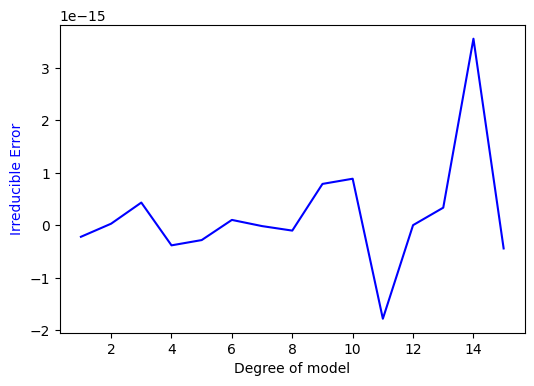

In [7]:
#Plotting irreducible Error
plt.figure(figsize=(6, 4))
plt.plot(range(1, 16),irreducible_error,  color = 'blue')
plt.ylabel('Irreducible Error', fontsize=10, color = 'blue')
plt.xlabel('Degree of model', fontsize=10, color = 'black')
plt.show()

## 2.5 Task 5: Plotting Bias square  −  Variance graph

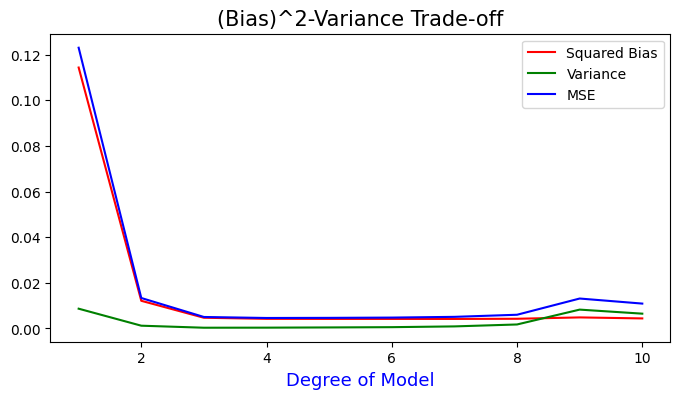

In [8]:
# depicting the bias square -variance tradeoff
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11),squared_bias[0:10],  color = 'red')
plt.plot(range(1, 11),variance[0:10],  color = 'green')
plt.plot(range(1, 11),mse[0:10],  color = 'blue')

plt.xlabel('Degree of Model', fontsize=13, color = 'blue')
plt.title('(Bias)^2-Variance Trade-off', fontsize=15)
plt.legend(['Squared Bias', 'Variance', 'MSE'])